In [1]:
import numpy as np

In [2]:
data = np.loadtxt('Audiobooks_data.csv',delimiter=',')

In [3]:
input_dataset = data[:,1:-1]

In [4]:
input_dataset.shape

(14084, 10)

In [5]:
target_data = data[:,-1]

In [6]:
target_data.shape

(14084,)

In [7]:
shuffle_indices = np.arange(input_dataset.shape[0])

In [8]:
np.random.shuffle(shuffle_indices)

In [9]:
shuffle_indices

array([ 9118, 10534,  7714, ...,  1509,    44,  2801])

In [10]:
shuffled_input_data = input_dataset[shuffle_indices]

In [11]:
shuffled_target_data = target_data[shuffle_indices]

In [12]:
shuffled_target_data

array([0., 0., 0., ..., 1., 0., 0.])

In [13]:
no_of_yes_target = np.sum(shuffled_target_data)

In [14]:
no_of_yes_target

2237.0

In [15]:
indices_to_remove = []
zero_count = 0 
for i in range(shuffled_target_data.shape[0]):
    if shuffled_target_data[i] == 0:
        zero_count += 1
        if zero_count > no_of_yes_target:
            indices_to_remove.append(i)
        

In [16]:
balanced_input_dataset = np.delete(shuffled_input_data,indices_to_remove,axis=0)

In [17]:
balanced_target_dataset = np.delete(shuffled_target_data,indices_to_remove,axis=0)

In [18]:
balanced_input_dataset.shape,balanced_target_dataset.shape

((4474, 10), (4474,))

In [19]:
import sklearn.preprocessing

In [20]:
scaled_input_data = sklearn.preprocessing.scale(balanced_input_dataset)

In [21]:
scaled_input_data

array([[-0.74402511, -0.73816517, -0.37974765, ..., -0.37106515,
        -0.18405308,  0.58786067],
       [-0.74402511, -0.73816517, -0.37974765, ..., -0.37106515,
        -0.18405308, -0.75543069],
       [ 1.21088994,  0.3745125 , -0.37974765, ..., -0.37106515,
        -0.18405308, -0.75543069],
       ...,
       [ 1.21088994,  0.3745125 ,  0.18466256, ..., -0.37106515,
        -0.18405308, -0.75543069],
       [-2.48172737, -1.72721198,  0.18466256, ..., -0.37106515,
        -0.18405308, -0.75543069],
       [ 1.21088994,  0.3745125 ,  0.63492239, ..., -0.37106515,
        -0.18405308, -0.75543069]])

In [22]:
shuffled_indices = np.arange(scaled_input_data.shape[0])
np.random.shuffle(shuffled_indices)

In [23]:
shuffled_indices

array([2312, 2939, 2095, ...,  240, 4187, 3029])

In [24]:
final_input_data = scaled_input_data[shuffled_indices]

In [25]:
final_target = balanced_target_dataset[shuffled_indices]

In [26]:
no_of_samples = final_input_data.shape[0]
no_of_samples

4474

In [27]:
num_train_sample = int(0.8*no_of_samples)
num_validation_sample = int(0.1*no_of_samples)
num_test_sample = no_of_samples-num_train_sample-num_validation_sample
print(num_test_sample,num_train_sample,num_validation_sample)

448 3579 447


In [28]:
train_input,train_output = final_input_data[:num_train_sample],final_target[:num_train_sample]
validation_input,validation_output = final_input_data[num_train_sample:num_train_sample+num_validation_sample], \
final_target[num_train_sample:num_train_sample+num_validation_sample]

test_input,test_output = final_input_data[num_train_sample+num_validation_sample:],final_target[num_train_sample+num_validation_sample:]

In [29]:
train_samples_count = num_train_sample

In [30]:
print(np.sum(train_output), train_samples_count, np.sum(train_output) / train_samples_count)
print(np.sum(validation_output), num_validation_sample, np.sum(validation_output) / num_validation_sample)
print(np.sum(test_output), num_test_sample, np.sum(test_output) / num_test_sample)

1776.0 3579 0.49622799664710815
236.0 447 0.5279642058165548
225.0 448 0.5022321428571429


In [31]:
np.savez('train_dataset',inputs = train_input,outputs = train_output)
np.savez('validation_dataset',inputs = validation_input,outputs = validation_output)
np.savez('test_dataset',inputs = test_input,outputs = test_output)

In [32]:
train_data = np.load('train_dataset.npz')
test_data = np.load('test_dataset.npz')
validation_data = np.load('validation_dataset.npz')

In [33]:
train_input,train_target = train_data['inputs'],train_data['outputs']
test_input, test_target = test_data['inputs'],test_data['outputs']
validation_input,validation_target = validation_data['inputs'],validation_data['outputs']

In [34]:
import tensorflow as tf

In [35]:

#del model

In [36]:
early_stop = tf.keras.callbacks.EarlyStopping(patience=2,verbose=1)

In [37]:
OUTPUT = 2
INPUT = 10
HIDDEN_LAYER_SIZE = 50


model = tf.keras.Sequential([
                tf.keras.layers.Dense(HIDDEN_LAYER_SIZE,activation='relu'),
                tf.keras.layers.Dense(HIDDEN_LAYER_SIZE,activation='relu'),
                tf.keras.layers.Dense(OUTPUT,activation='softmax')
])

In [38]:
model.compile(optimizer='adam',loss='SparseCategoricalCrossentropy',metrics=['accuracy'])

In [39]:
EPOCH = 100
BATCH = 100


In [40]:
model.fit(
        train_input,train_target,
        epochs=EPOCH,
        batch_size=BATCH,
        validation_data=(validation_input,validation_output),
        verbose=2,
        callbacks=early_stop
)

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing 

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

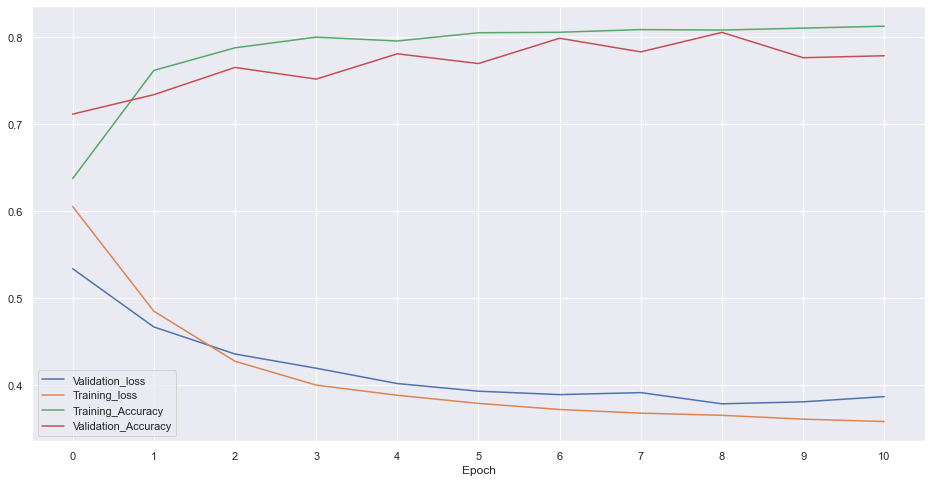

In [42]:
plt.figure(figsize=(16,8))
plt.plot(model.history.epoch,model.history.history['val_loss'],label='Validation_loss')
plt.plot(model.history.epoch,model.history.history['loss'],label='Training_loss')
plt.plot(model.history.epoch,model.history.history['accuracy'],label='Training_Accuracy')
plt.plot(model.history.epoch,model.history.history['val_accuracy'],label='Validation_Accuracy')
plt.xlabel('Epoch')
plt.xticks(model.history.epoch)
plt.legend()

In [43]:
loss,accuracy = model.evaluate(test_input,test_target)

14/14 [==============================] - 0s 2ms/step - loss: 0.3499 - accuracy: 0.8147
